<a href="https://colab.research.google.com/github/akipips/kaggle/blob/master/house_price/EDA/explain_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##gole
テストセットの各IDについて、SalePrice変数の値を予測する.
## 詳細
提出物は、予測値の対数と観測された販売価格の対数との間のRoot-Mean-Squared-Error（RMSE）で評価されます。 （ログを取ることは、高価な家と安い家を予測する際のエラーが結果に等しく影響することを意味します。）

##特徴量

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: 建物のクラス

MSZoning: The general zoning classification　

LotFrontage: 間口の広さ

LotArea: 区画の大きさ

Street: 道路アクセスのタイプ

Alley: 路地アクセスのタイプ

LotShape: 土地の形状

LandContour: 土地が平たんか

Utilities: 利便性？

LotConfig: Lot configuration　区画の構成

LandSlope: 土地の傾斜

Neighborhood: AMES市での位置

Condition1: 幹線道路または鉄道に近接

Condition2: Proximity to main road or railroad (if a 
second is present)

BldgType: Type of dwelling　住居の種類

HouseStyle: Style of dwelling　住居のスタイル

OverallQual: 材質と仕上がり観

OverallCond: 全体的な状態の評価

YearBuilt: 建てられた年

YearRemodAdd: リフォームされた年

RoofStyle: 屋根のタイプ

RoofMatl: 屋根の材質

Exterior1st: Exterior covering on house　家の外装

Exterior2nd: Exterior covering on house (if more than one 
material)

MasVnrType: 石積みのベニヤのタイプ

MasVnrArea: 石積みベニアの面積

ExterQual: Exterior material quality　家の外装の材料

ExterCond: 外装の状態

Foundation: Type of foundation 基礎の種類

BsmtQual: 地下スペースの高さ

BsmtCond: 地下のコンディション

BsmtExposure: ???

BsmtFinType1: Quality of basement finished area　？？？

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: 地下室の面積

Heating: 暖房の種類

HeatingQC: 暖房の状態

CentralAir: 中央のエアコン

Electrical: 電気系統

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all 
floors)低品質の完成平方フィート(すべてのフロア)

GrLivArea: Above grade (ground) living area square feet 
グレード（地上）のリビングエリアの平方フィート

BsmtFullBath: 地下室の完備型バス

BsmtHalfBath: 地下室のハーフ型バス

FullBath: Full bathrooms above grade　グレードを超えるフ
ルバスルーム　？？？

HalfBath: Half baths above grade　

Bedroom: Number of bedrooms above basement level　地下階より上の寝室の数

Kitchen: キッチンの数

KitchenQual: キッチンの数

TotRmsAbvGrd: Total rooms above grade (does not include 
bathrooms)???

Functional: Home functionality rating 家の機能的な評価

Fireplaces: 暖炉の数

FireplaceQu: 暖炉の質

GarageType: ガレージの場所

GarageYrBlt: ガレージが建てられた年

GarageFinish: Interior finish of the garage　ガレージの内装仕上げ

GarageCars: Size of garage in car capacity　車の収容スペース

GarageArea: Size of garage in square feet　ガレージの面積

GarageQual: Garage quality　ガレージの質

GarageCond: Garage condition　ガレージの状態

PavedDrive: Paved driveway　舗装された車道

WoodDeckSF: Wood deck area in square feet　ウッドデッキの面積

OpenPorchSF: Open porch area in square feet open porch の面積

EnclosedPorch: Enclosed porch area in square feet　部屋タイプのopenporchの面積

3SsnPorch: Three season porch area in square feet　3Sタイプのopenporchの面積

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet poolの面積

PoolQC: Pool quality プールの質

Fence: Fence quality　フェンスの質

MiscFeature: Miscellaneous feature not covered in other categories　他のカテゴリでカバーされていないその他の機能

MiscVal: $Value of miscellaneous feature　その他の機能の$ Value

MoSold: Month Sold　売れた月

YrSold: Year Sold　うれた年

SaleType: Type of sale　販売タイプ

SaleCondition: Condition of sale　



zoning
![代替テキスト](https://www.kagukuro.com/basic/zoning/img/gp_zoning02.gif)

open porch

![open porch](https://i.pinimg.com/originals/6a/43/33/6a433339ccb03c32d7c7a68239917ab5.jpg)
Enclosed porch
![代替テキスト](https://structurallyspeaking.com/wp-content/uploads/2019/01/26301869_s.jpg)

追加で家の平方フィートを拡大することは、生活空間を追加するエキサイティングな方法です。スクリーンポーチ、3シーズンルーム、オールシーズンルームなど、いくつかのオプションがあります。

3シーズンの部屋はガラスで囲まれたオプションです。

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
def describe_object(df,col_name):
  print("カラム名:{}".format(col_name))
  print("{}個の値があります。".format(df[col_name].nunique()))
  print("詳細")
  print(df[col_name].value_counts(dropna=False,normalize=True))
  fig, ax = plt.subplots(figsize=(14,7))
  plt.xticks(rotation=90);
  if df[col_name].dtype=="object":
    sns.swarmplot(x=col_name, y="SalePrice",data=df,ax=ax)
  elif df[col_name].dtype=="float" or "int":
    df.plot.scatter(x=col_name, y='SalePrice')

カラム名:MSZoning
5個の値があります。
詳細
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64


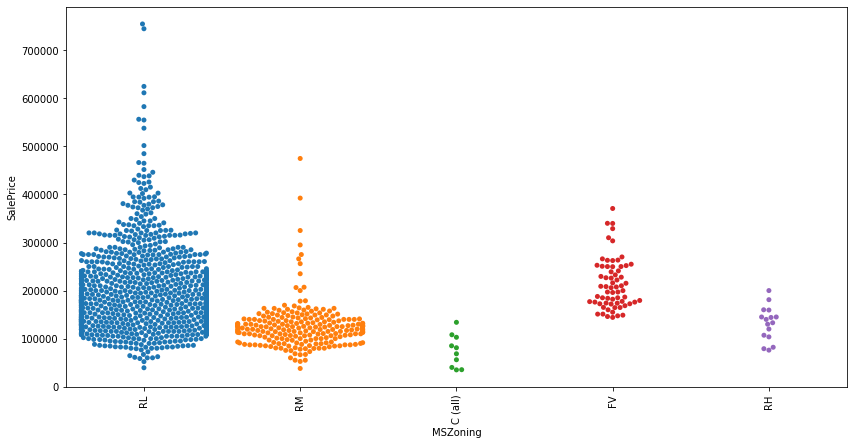

In [ ]:
describe_object(train,"MSZoning")

カラム名:Utilities
2個の値があります。
詳細
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64


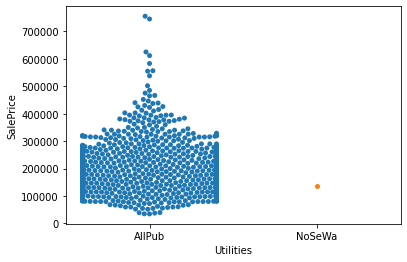

In [ ]:
describe_object(train,"Utilities")

カラム名:MiscFeature
4個の値があります。
詳細
NaN     0.963014
Shed    0.033562
Gar2    0.001370
Othr    0.001370
TenC    0.000685
Name: MiscFeature, dtype: float64


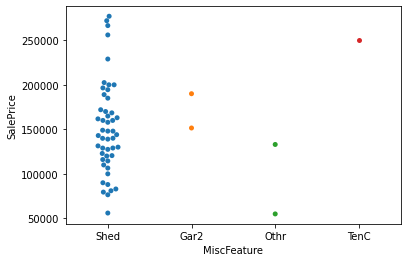

In [ ]:
describe_object(train,"MiscFeature")

カラム名:SaleCondition
6個の値があります。
詳細
Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: SaleCondition, dtype: float64


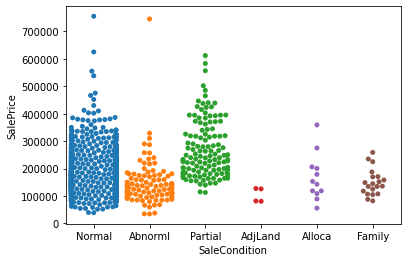

In [ ]:
describe_object(train,"SaleCondition")
#partial=部分的な販売？
#

カラム名:BsmtUnfSF
780個の値があります。
詳細
0       0.080822
728     0.006164
384     0.005479
572     0.004795
600     0.004795
          ...   
731     0.000685
730     0.000685
726     0.000685
725     0.000685
2046    0.000685
Name: BsmtUnfSF, Length: 780, dtype: float64


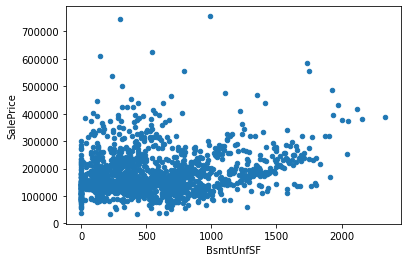

In [ ]:
describe_object(train,"BsmtUnfSF")

カラム名:Neighborhood
25個の値があります。
詳細
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64


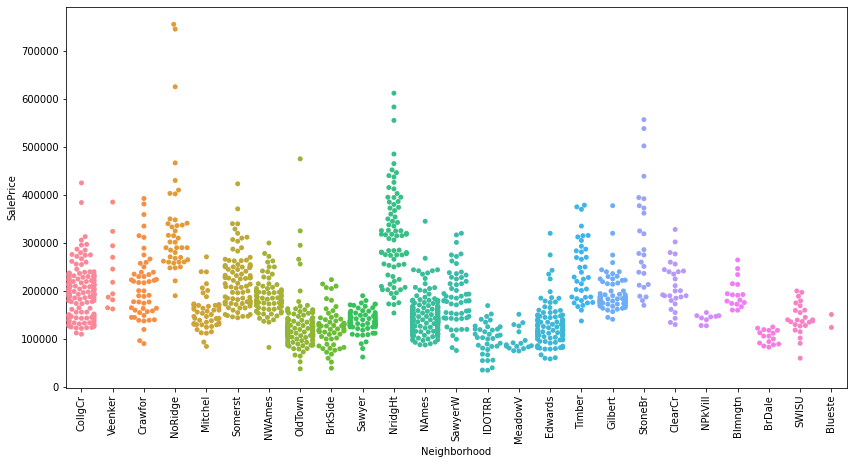

In [ ]:
describe_object(train,"Neighborhood")